In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
from scipy.misc import imread, imresize
from data_utils import get_CIFAR10_data
import resource
import numpy as np
from numpy import float32

# reload(data_utils)
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
# plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

data = get_CIFAR10_data()
for k, v in data.iteritems():
  print '%s: ' % k, v.shape

X_val:  (1000, 3, 32, 32)
X_train:  (49000, 3, 32, 32)
X_test:  (1000, 3, 32, 32)
y_val:  (1000,)
y_train:  (49000,)
y_test:  (1000,)


(480, 640, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)


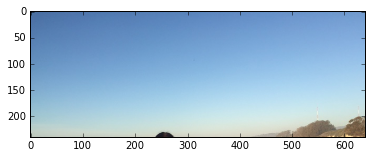

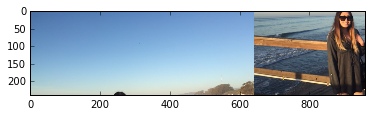

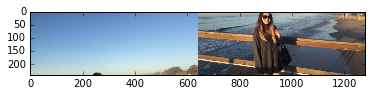

In [4]:
filename = "pier.JPG"
raw_image_data = imread(filename)
print raw_image_data.shape

raw_image_data = np.fliplr(raw_image_data)

H,W,_ = raw_image_data.shape

image = tf.placeholder("uint8", [None, None, 3])
index_i = tf.placeholder("int32")
index_j = tf.placeholder("int32")
divides = tf.placeholder("int32")
sliced = tf.slice(image, tf.pack([H/divides*index_i, W/divides*index_j, 0]), tf.pack([H/divides,W/divides,-1]))

results = []
# break image into 4 corners
with tf.Session() as session:
    for i in xrange(2):
        for j in xrange(2):
            result = session.run(sliced, feed_dict={image:raw_image_data, index_i:i, index_j:j, divides:2})
            print result.shape
            results.append(result)
    
    restitched = results[0]
    print restitched.shape
    for result in results[1:]:
        restitched = tf.concat(1,[restitched, result])
        plt.imshow(session.run(restitched))
        plt.show()
    
# re-stich image:
# for result in results:
    


In [7]:
# Self notes, had to restart kernel when doing computation of matmul with big matrix

def pmem():
    print("{} Kb".format(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss))
session = tf.InteractiveSession()
X = tf.constant(np.eye(100))
Y = tf.constant(np.random.randn(100,3))
pmem()

Z = tf.matmul(X,Y)
pmem()
session.run(Z)
pmem()

session.close()

102125568 Kb
102125568 Kb
102420480 Kb


In [4]:
from twolayer import TwoLayerNet

In [92]:


N, D, H, C = 3, 5, 50, 7
X = np.random.randn(N, D)
y = np.random.randint(C, size=N)

X = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
y = np.asarray([0, 5, 1])

num_train = N
# model = TwoLayerNet(input_dim=D, hidden_dim=H, num_classes=C, weight_scale=std)
X = np.reshape(X, (X.shape[0], -1))
W1 = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
b1 = np.linspace(-0.1, 0.9, num=H)
W2 = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
b2 = np.linspace(-0.9, 0.1, num=C)

correct_scores = np.asarray(
  [[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
   [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
   [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]])


# print X.shape
# print W.shape

L1_scores = tf.matmul(X,W1) + b1
L1 = tf.nn.relu(L1_scores)
# L1 = tf.nn.softmax(L1_relu)
scores = tf.matmul(L1, W2) + b2
# tf.nn.softmax_cross_entropy_with_logits(scores, y, name=None)
# softmax = tf.nn.softmax(scores, name=None)
# loss = tf.reduce_mean(softmax, name='mean')

init = tf.initialize_all_variables()
correct_loss = 3.4702243556

with tf.Session() as session:
    score_results = session.run(scores)
#     print session.run(scores)
    
    exp_scores = np.exp(score_results)
    score_results -= np.max(score_results)
    p = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    loss = np.sum(-np.log(p[range(num_train), y])) / num_train
    print loss
    assert abs(loss - correct_loss) < 1e-10, 'Problem with training-time loss'
    


3.4702243556


In [ ]:

# num_train = 10000
# batch_size = 10
# small_data = {
#   'X_train': data['X_train'][:num_train],
#   'y_train': data['y_train'][:num_train],
#   'X_val': data['X_val'],
#   'y_val': data['y_val'],
# }

# input_dim = 3*32*32
# hidden_dim = 100
# num_classes = 10
# X = small_data['X_train'].astype(float32)
# X = np.reshape(X, (X.shape[0], -1))
# y = small_data['y_train']
# y = (np.eye(num_classes)[y]).astype(int)  # convert to one-hot

# # print X.shape
# x = tf.placeholder(tf.float32, shape=[None, 3*32*32], name="x_placeholder")
# y_ = tf.placeholder(tf.float32, shape=([None, 10]), name="y_placeholder")

# W1 = tf.Variable((1e-3*np.random.randn(input_dim, hidden_dim)).astype(float32), name="W1")
# W2 = tf.Variable((1e-3*np.random.randn(hidden_dim, num_classes)).astype(float32), name="W2")
# b1 = tf.Variable(tf.zeros([hidden_dim]), name='b1')
# b2 = tf.Variable(tf.zeros([num_classes]), name='b2')

# # print X.shape
# # print W1.shape
# L1_scores = tf.matmul(x, W1) + b1
# L1 = tf.nn.relu(L1_scores)
# scores = tf.matmul(L1, W2) + b2

# print scores
# print y_
# # cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(scores, y_, name='xentropy')
# softm = tf.nn.softmax(scores)
# cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(softm), reduction_indices=[1]))
# loss = tf.reduce_mean(cross_entropy, name='xentropy_mean')

# optimizer = tf.train.GradientDescentOptimizer(0.001)
# # Create a variable to track the global step.
# global_step = tf.Variable(0, name='global_step', trainable=False)

# # Use the optimizer to apply the gradients that minimize the loss
# # (and also increment the global step counter) as a single training step.
# train_op = optimizer.minimize(loss, global_step=global_step)

# # softmax = tf.nn.softmax(scores, name=None)
# # loss = tf.reduce_mean(softmax, name='mean')
# with tf.Session() as session:
#     session.run(tf.initialize_all_variables())
#     for i in range(num_train/batch_size):
#         batch_xs = X[i*batch_size:i*batch_size+batch_size]
#         batch_ys = y[i*batch_size:i*batch_size+batch_size]
# #         print batch_ys.shape
# #         print batch_xs.shape
#         session.run(train_op, feed_dict={x: batch_xs, y_: batch_ys})
# #         print session.run(cross_entropy, feed_dict={x: batch_xs, y_: batch_ys})
#         print session.run(loss, feed_dict={x: batch_xs, y_: batch_ys})


# #     correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
# #     accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# #     print(accuracy.eval({x: X, y_: y}))


# # correct_loss = 3.4702243556
# # with tf.Session() as session:
# #     score_results = session.run(scores)
# # #     print session.run(scores)
    
# #     exp_scores = np.exp(score_results)
# #     score_results -= np.max(score_results)
# #     p = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
# #     loss = np.sum(-np.log(p[range(num_train), y])) / num_train
# #     print loss
# # #     assert abs(loss - correct_loss) < 1e-10, 'Problem with training-time loss'

In [21]:
"""
This is a rough translation of TwoLayerNet
"""

num_train = 49000 #49000
num_epochs = 10
batch_size = 200
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

input_dim = 3*32*32
hidden_dim = 200
num_classes = 10
X = small_data['X_train'].astype(float32)
X = np.reshape(X, (X.shape[0], -1))
y = small_data['y_train']

X_val = small_data['X_val'].astype(float32)
X_val = np.reshape(X_val, (X_val.shape[0], -1))
y_val = small_data['y_val']

# Placeholders
x = tf.placeholder(tf.float32, shape=[None, 3*32*32], name="x_placeholder")
y_ = tf.placeholder(tf.int64, shape=(None), name="y_placeholder")
keep_prob = tf.placeholder(tf.float32, name="keep_prob_placeholder")


W1 = tf.Variable(1e-3*tf.truncated_normal((input_dim, hidden_dim), stddev=0.1), name="W1")
W2 = tf.Variable((1e-3*np.random.randn(hidden_dim, num_classes)).astype(float32), name="W2")
b1 = tf.Variable(tf.zeros([hidden_dim]), name='b1')
b2 = tf.Variable(tf.zeros([num_classes]), name='b2')

L1_scores = tf.matmul(x, W1) + b1
L1 = tf.nn.relu(L1_scores)
L1_drop = tf.nn.dropout(L1, keep_prob)

# Readout layer
L2_scores = tf.matmul(L1_drop, W2) + b2

cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(L2_scores, y_, name='xentropy')
loss = tf.reduce_mean(cross_entropy, name='xentropy_mean')

optimizer = tf.train.GradientDescentOptimizer(6e-4) #.001
# Create a variable to track the global step.
global_step = tf.Variable(0, name='global_step', trainable=False)

# Use the optimizer to apply the gradients that minimize the loss
# (and also increment the global step counter) as a single training step.
train_op = optimizer.minimize(loss, global_step=global_step)

# softmax = tf.nn.softmax(scores, name=None)
# loss = tf.reduce_mean(softmax, name='mean')
with tf.Session() as session:
    session.run(tf.initialize_all_variables())
    for epoch in xrange(num_epochs):
        for i in xrange(num_train/batch_size):
            batch_xs = X[i*batch_size:i*batch_size+batch_size] # (batchsize, image_dim)
            batch_ys = y[i*batch_size:i*batch_size+batch_size] # (batchsize,)
            
            session.run(train_op, feed_dict={x: batch_xs, y_: batch_ys, keep_prob:0.5})
    #         print session.run(cross_entropy, feed_dict={x: batch_xs, y_: batch_ys})
            
        feed_train = {x: batch_xs, y_: batch_ys, keep_prob:1}
        feed_val = {x: X_val, y_: y_val, keep_prob:1}
        correct_prediction = tf.equal(tf.argmax(L2_scores, 1), y_)
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        train_acc_result = accuracy.eval(feed_train)
        val_acc_result = accuracy.eval(feed_val)
        print("(Epoch: {e}/{et}) train acc {tacc}; val_acc: {vacc}".format(
                e=epoch+1,et=num_epochs, tacc=train_acc_result, vacc=val_acc_result))
        print session.run(loss, feed_dict=feed_train)


(Epoch: 1/10) train acc 0.379999995232; val_acc: 0.409000009298
1.71314
(Epoch: 2/10) train acc 0.449999988079; val_acc: 0.442000001669
1.57905
(Epoch: 3/10) train acc 0.504999995232; val_acc: 0.462000012398
1.48706
(Epoch: 4/10) train acc 0.5; val_acc: 0.488999992609
1.43092
(Epoch: 5/10) train acc 0.524999976158; val_acc: 0.497000008821
1.40165
(Epoch: 6/10) train acc 0.535000026226; val_acc: 0.488999992609
1.35809
(Epoch: 7/10) train acc 0.560000002384; val_acc: 0.510999977589
1.3298
(Epoch: 8/10) train acc 0.550000011921; val_acc: 0.509999990463
1.30815
(Epoch: 9/10) train acc 0.564999997616; val_acc: 0.523999989033
1.29492
(Epoch: 10/10) train acc 0.574999988079; val_acc: 0.514999985695
1.2724


In [190]:
# correct = tf.nn.in_top_k(logits, labels, 1)
# # Return the number of true entries.
# print tf.reduce_sum(tf.cast(correct, tf.int32))



Tensor("Mean_11:0", dtype=float32)
